In [72]:
using Plots, DifferentialEquations, Distributions, Random, LaTeXStrings, DataFrames, GLM, JLD2, FileIO, StatsPlots, LinearAlgebra, PyCall, DataStructures, SpecialFunctions,Colors

In [2]:
# devo ottenere dei vettori che abbiano per ogni fattore di diluizione tante componenti quante sono le sigma 
# prima però devo fare i conti sulla varianza e diversity mediando per il numero di realizzazioni

si = [0.001,0.01,0.02,0.04,0.07,0.1,0.25,0.5];
D = [1.05,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0];

In [8]:
for d in D 
    global variance = []
    global diversity = []
    global distribution = []
    for s in si
        tmp = FileIO.load("./simulation_everything/consumers_simulation_$d"*"_s$s.jld2","s")
        tmp_rescaled = [tmp[i]./mean(tmp[i],dims=2) for i in 1:length(tmp)]
        # mean_variance_tmp = mean([mean(var(tmp_rescaled[i],dims=1)) for i in 1:length(tmp)])
        mean_variance_tmp = mean([var(tmp_rescaled[i],dims=2)[end] for i in 1:length(tmp)])
        mean_diversity = mean([length(tmp_rescaled[i][end,:]) for i in 1:length(tmp)])
        push!(variance,mean_variance_tmp)
        push!(diversity,mean_diversity)
        push!(distribution,tmp_rescaled)
    end
    FileIO.save("./variance_diversity/diversity_d$d.jld2","diversity",diversity)
    FileIO.save("./variance_diversity/variance_d$d.jld2","variance",variance)
    FileIO.save("./variance_diversity/distributions_d$d.jld2","distribution",distribution)
end

In [9]:
dictionary_diversity = OrderedDict()
dictionary_variance = OrderedDict()

for d in D
    dictionary_diversity[d] = FileIO.load("./variance_diversity/diversity_d$d.jld2","diversity") .+ 1
    dictionary_variance[d] = FileIO.load("./variance_diversity/variance_d$d.jld2","variance")
end

In [14]:
n = 19
CList = reshape( range(colorant"blue3", stop=colorant"skyblue",length=n), 1, n );

In [27]:
plot((si)*sqrt(50),[sqrt.([values(dictionary_variance)...][i]) for i in 1:19],marker=:circle,label=["D=$i" for i in [keys(dictionary_variance)...]'],size=(1000,700),
     color=CList,linewidth=2,xaxis=:log10,yaxis=:log10,legend=:bottomright, xlabel="Scaled variability "*L"\sigma \cdot \sqrt{M}"*" of the consumption matrix",
     ylabel=L"\langle \sqrt{Var\{X^R_i(T)\}} \rangle_R",thickness_scaling=1.2,title=L"M=50"*" dense consumption matrix case")
# plot!((si.^2)*50,[values(dictionary_variance)...][3],linewidth=10)
# savefig("variance_m50_dense.png")

In [31]:
plot((si)*sqrt(50),[sqrt.([values(dictionary_variance)...][i])./(si)*sqrt(50) for i in 1:19],marker=:circle,label=["D=$i" for i in [keys(dictionary_variance)...]'],size=(1000,700),
     color=CList,linewidth=2,xaxis=:log10,legend=:bottomleft, xlabel=L"\sigma \cdot \sqrt{M}",
     ylabel=L"\langle \sqrt{Var\{X^R_i(T)\}} \rangle_R / \sigma \cdot \sqrt{M}",thickness_scaling=1.2,title=L"M=50"*" dense consumption matrix case",yaxis=:log10)
# plot!((si.^2)*50,[values(dictionary_variance)...][3],linewidth=10)
# savefig("variance_rescaled_m50_dense.png")

In [36]:
plot((si)*sqrt(50),([values(dictionary_diversity)...]./50)*100,marker=:circle,label=["D=$i" for i in [keys(dictionary_diversity)...]'],size=(1000,700),
color=CList,linewidth=2,xaxis=:log10,legend=:topleft, xlabel="Scaled variability "*L"\sigma \cdot \sqrt{M}"*" of the consumption matrix",
     ylabel="% Diversity "*L"\varPhi^*",thickness_scaling=1.2,title=L"M=50"*" dense consumption matrix case")
# Multiple labels must be in a row vector
# plot!([0.02,0.25],[30,40],arrow=true,color=:black,linewidth=2,label="")
# savefig("diversity_m50_dense.png")

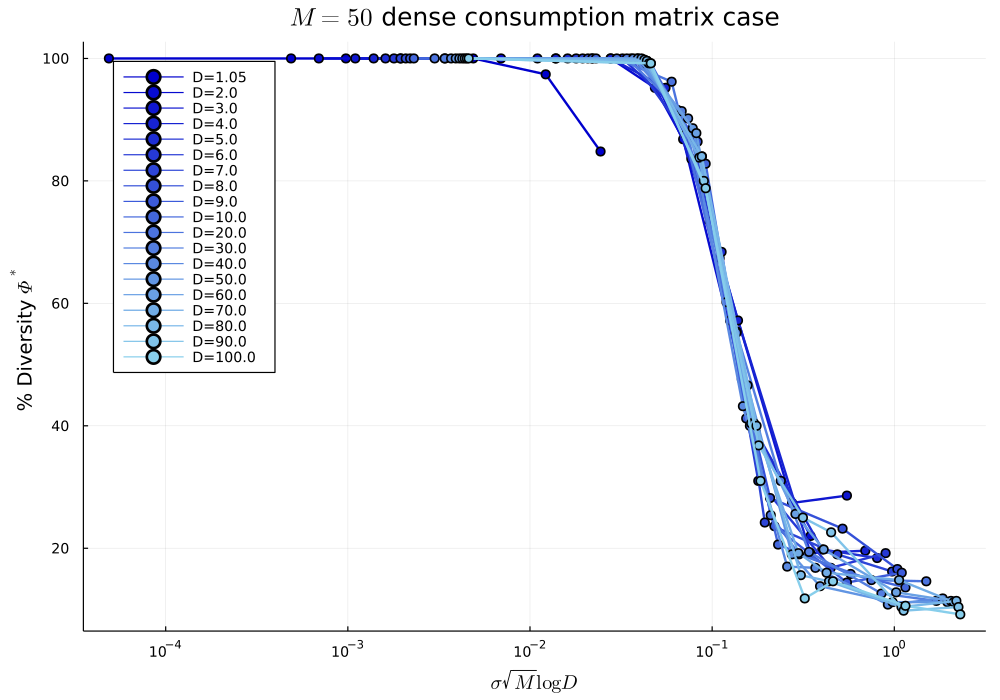

In [15]:
plot([((si)*sqrt(1))*log(D[i]) for i in 1:19],([values(dictionary_diversity)...]./50)*100,marker=:circle,label=["D=$i" for i in [keys(dictionary_diversity)...]'],size=(1000,700),
color=CList,linewidth=2,xaxis=:log10,legend=:topleft,xlabel=L"\sigma \sqrt{M} \log{D}",
     ylabel="% Diversity "*L"\varPhi^*",thickness_scaling=1.2,title=L"M=50"*" dense consumption matrix case")
# Multiple labels must be in a row vector
# plot!([0.02,0.25],[30,40],arrow=true,color=:black,linewidth=2,label="")
# savefig("diversity_m50_dense_collapse.png")

In [359]:
div = []
sigma = si[end-1]

for (i,j) in dictionary_diversity
    push!(div,j[end-1])
end

last_div = (div[end]/50)*100

plot(log.(D),(div./50)*100,marker=:circle,size=(800,500),label=L"\sigma = "*"$sigma",linewidth=2,ylabel="% Diversity "*L"\varPhi^*",
     xlabel="Dilution factor "*L"\log(D)",title="Dense consumption matrix case",thickness_scaling=1.1)
annotate!(log(60),(10/50)*100,text(L"\varPhi^*(D=100) = "*"$last_div"*"%",12))
plot!([log(90),log(100)],[(8.5/50)*100,(5/50)*100],arrow=true,color=:black,linewidth=2,label="")
# savefig("diversity_logD_m50_dense.png")

In [397]:
a = FileIO.load("./variance_diversity/distributions_d1.05.jld2","distribution");
a1 = FileIO.load("./variance_diversity/distributions_d100.0.jld2","distribution");

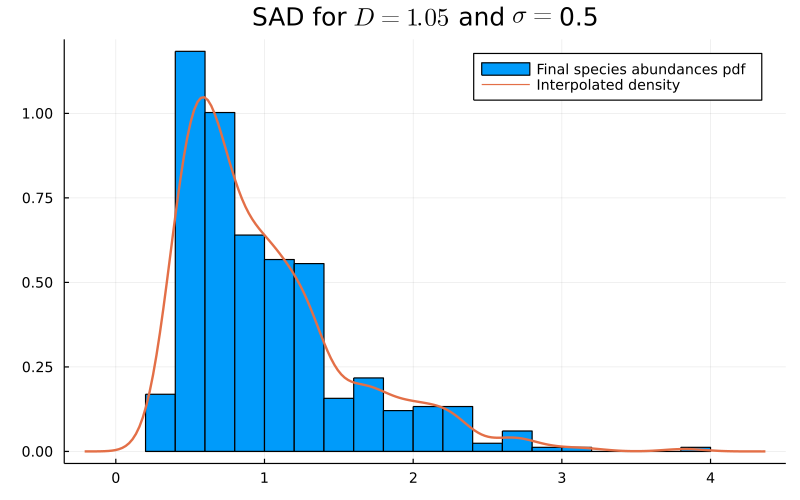

In [408]:
j = 8 # sono i sigma 
b = [a[j][i][end,:] for i in 1:10];
hh = si[j]
b_fin = vcat(b...);
histogram(b_fin,size=(800,500),normalize=:pdf,label="Final species abundances pdf",title="SAD for "*L"D=1.05"*" and "*L"\sigma="*"$hh",thickness_scaling=1.2)
density!(b_fin,linewidth=2,label="Interpolated density")

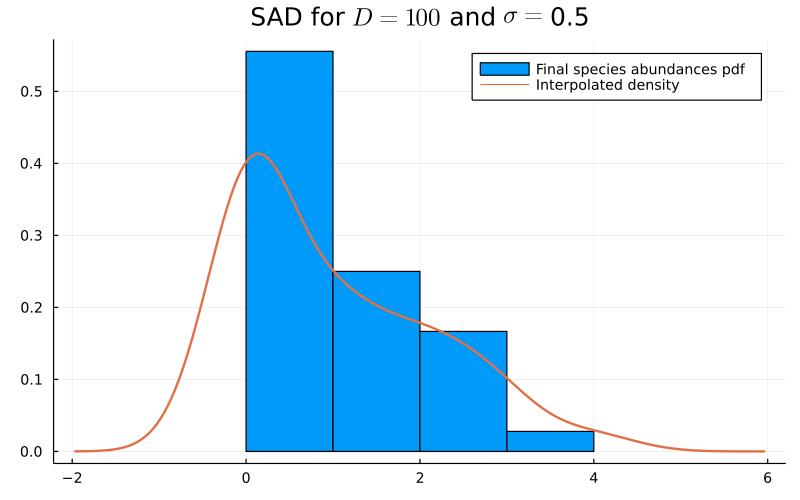

In [409]:
b1 = [a1[j][i][end,:] for i in 1:10];
b_fin1 = vcat(b1...);
histogram(b_fin1,size=(800,500),normalize=:pdf,label="Final species abundances pdf",title="SAD for "*L"D=100"*" and "*L"\sigma="*"$hh",thickness_scaling=1.2)
density!(b_fin1,linewidth=2,label="Interpolated density")

In [13]:
# SPARSITY S = 0.1
for d in D 
    global variance = []
    global diversity = []
    global distribution = []
    for s in si
        tmp = FileIO.load("./simulation_everything/consumers_simulation_$d"*"_s$s"*"_sparse.jld2","s")
        tmp_rescaled = [tmp[i]./mean(tmp[i],dims=2) for i in 1:length(tmp)]
        # mean_variance_tmp = mean([mean(var(log.(tmp_rescaled[i]),dims=1)) for i in 1:length(tmp)])
        mean_variance_tmp = mean([var(tmp_rescaled[i],dims=2)[end] for i in 1:length(tmp)])
        mean_diversity = mean([length(tmp_rescaled[i][end,:]) for i in 1:length(tmp)])
        push!(variance,mean_variance_tmp)
        push!(diversity,mean_diversity)
        push!(distribution,tmp_rescaled)
    end
    FileIO.save("./variance_diversity/diversity_d$d"*"_sparse.jld2","diversity",diversity)
    FileIO.save("./variance_diversity/variance_d$d"*"_sparse.jld2","variance",variance)
    FileIO.save("./variance_diversity/distributions_d$d"*"_sparse.jld2","distribution",distribution)
end

In [14]:
# SPARSITY S = 0.1
dictionary_diversity_sparse = OrderedDict()
dictionary_variance_sparse = OrderedDict()

for d in D
    dictionary_diversity_sparse[d] = FileIO.load("./variance_diversity/diversity_d$d"*"_sparse.jld2","diversity") .+ 1
    dictionary_variance_sparse[d] = FileIO.load("./variance_diversity/variance_d$d"*"_sparse.jld2","variance")
end

In [32]:
plot((si)*sqrt(50),[values(dictionary_variance_sparse)...],marker=:circle,label=["D=$i" for i in [keys(dictionary_variance_sparse)...]'],size=(1000,700),
color=CList,linewidth=2,xaxis=:log10,legend=:topleft, xlabel="Scaled variability "*L"\sigma \cdot \sqrt{M}"*" of the consumption matrix",
     ylabel=L"\langle \sqrt{Var\{X^R_i(T)\}} \rangle_R",thickness_scaling=1.2,title=L"M=50"*" sparse consumption matrix case "*L"S=0.1")
savefig("variance_m50_sparse.png")

In [43]:
plot((si)*sqrt(50),([values(dictionary_diversity_sparse)...]./50)*100,marker=:circle,label=["D=$i" for i in [keys(dictionary_diversity_sparse)...]'],size=(1000,700),
color=CList,linewidth=2,xaxis=:log10,legend=:topleft,xlabel="Variability "*L"\sigma \cdot \sqrt{M}"*" of the consumption matrix",
     ylabel="% Diversity "*L"\varPhi^*",thickness_scaling=1.2,title=L"M=50"*" sparse consumption matrix case "*L"S=0.1")
# Multiple labels must be in a row vector
savefig("diversity_m50_sparse.png")

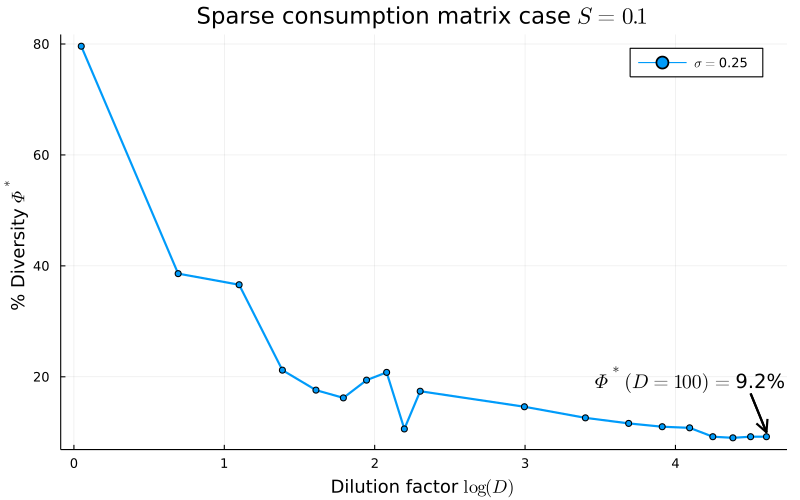

In [371]:
div = []
sigma = si[end-1]
for (i,j) in dictionary_diversity_sparse
    push!(div,j[end-1])
end

last_div = round((div[end]/50)*100,digits=1)

plot(log.(D),(div./50)*100,marker=:circle,size=(800,500),label=L"\sigma = "*"$sigma",linewidth=2,ylabel="% Diversity "*L"\varPhi^*",
     xlabel="Dilution factor "*L"\log(D)",title="Sparse consumption matrix case "*L"S=0.1",thickness_scaling=1.1)
annotate!(log(60),(10/50)*100,text(L"\varPhi^*(D=100) = "*"$last_div"*"%",12))
plot!([log(90),log(100)],[(8.5/50)*100,(5/50)*100],arrow=true,color=:black,linewidth=2,label="")
# savefig("diversity_logD_m50_sparse.png")

In [394]:
a = FileIO.load("./variance_diversity/distributions_d1.05_sparse.jld2","distribution");
a1 = FileIO.load("./variance_diversity/distributions_d100.0_sparse.jld2","distribution");

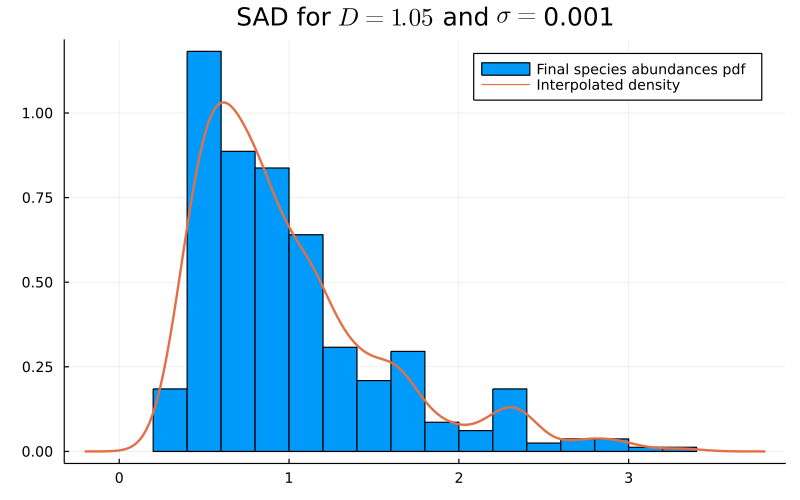

In [395]:
j = 1 # sono i sigma 
b = [a[j][i][end,:] for i in 1:10];
hh = si[j]
b_fin = vcat(b...);
histogram(b_fin,size=(800,500),normalize=:pdf,label="Final species abundances pdf",title="SAD for "*L"D=1.05"*" and "*L"\sigma="*"$hh",thickness_scaling=1.2)
density!(b_fin,linewidth=2,label="Interpolated density")

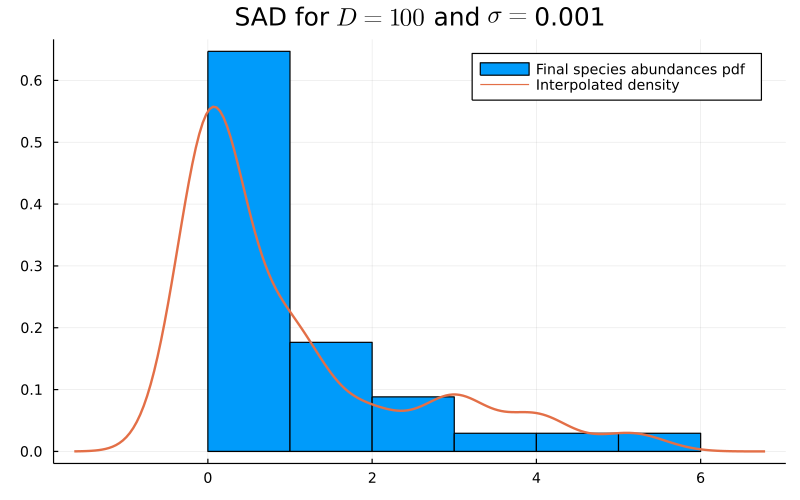

In [396]:
b1 = [a1[j][i][end,:] for i in 1:10];
b_fin1 = vcat(b1...);
histogram(b_fin1,size=(800,500),normalize=:pdf,label="Final species abundances pdf",title="SAD for "*L"D=100"*" and "*L"\sigma="*"$hh",thickness_scaling=1.2)
density!(b_fin1,linewidth=2,label="Interpolated density")

In [3]:
dictionary_diversity = OrderedDict()
dictionary_variance = OrderedDict()

for d in D
    dictionary_diversity[d] = FileIO.load("./variance_diversity/diversity_d$d.jld2","diversity") .+ 1
    dictionary_variance[d] = FileIO.load("./variance_diversity/variance_d$d.jld2","variance")
end

In [4]:
dictionary_diversity1 = OrderedDict()
dictionary_variance1 = OrderedDict()

for d in D
    dictionary_diversity1[d] = FileIO.load("./variance_diversity_1/diversity_d$d.jld2","diversity") .+ 1
    dictionary_variance1[d] = FileIO.load("./variance_diversity_1/variance_d$d.jld2","variance")
end

In [5]:
dictionary_diversity2 = OrderedDict()
dictionary_variance2 = OrderedDict()

for d in D
    dictionary_diversity2[d] = FileIO.load("./variance_diversity_2/diversity_d$d.jld2","diversity") .+ 1
    dictionary_variance2[d] = FileIO.load("./variance_diversity_2/variance_d$d.jld2","variance")
end

In [10]:
h = 2
varia = []
sigma = round(si[h]*sqrt(50),digits=3)

for (i,j) in dictionary_variance
    push!(varia,sqrt(j[h])/((si[h])*sqrt(1)))
end

varia1 = []
sigma1 = round(si[h]*sqrt(100),digits=3)

for (i,j) in dictionary_variance1
    push!(varia1,sqrt(j[h])/((si[h])*sqrt(1)))
end

varia2 = []
sigma2 = round(si[h]*sqrt(200),digits=3)

for (i,j) in dictionary_variance2
    push!(varia2,sqrt(j[h])/((si[h])*sqrt(1)))
end

In [56]:
plot(log.(D),varia,marker=:circle,size=(1000,700),label=L"\sigma \cdot \sqrt{M} = "*"$sigma "*L"M=50",linewidth=2,
ylabel=L"\langle \sqrt{Var\{X^R_i(T)\}} \rangle_R / \sigma ",
xlabel=L"\log(D)",title="Dense consumption matrix case "*L"\sigma=0.01",thickness_scaling=1.3,legend=:topleft)
plot!(log.(D),varia1,label=L"\sigma \cdot \sqrt{M} = "*"$sigma1   "*L"M=100",marker=:circle)
plot!(log.(D),varia2,label=L"\sigma \cdot \sqrt{M} = "*"$sigma2 "*L"M=200",marker=:circle)
# savefig("comparison_rescaled_variance_dense.png")

In [46]:
div = []
sigma = round(si[end-1]*sqrt(50),digits=2)

for (i,j) in dictionary_diversity
    push!(div,j[end-1]+1)
end

last_div = (div[end]/50)*100

div1 = []
sigma1 = round(si[end-1]*sqrt(100),digits=2)

for (i,j) in dictionary_diversity1
    push!(div1,j[end-1]+1)
end

last_div1 = (div1[end]/100)*100

div2 = []
sigma2 = round(si[end-1]*sqrt(200),digits=2)

for (i,j) in dictionary_diversity2
    push!(div2,j[end-1]+1)
end

last_div2 = (div2[end]/200)*100;

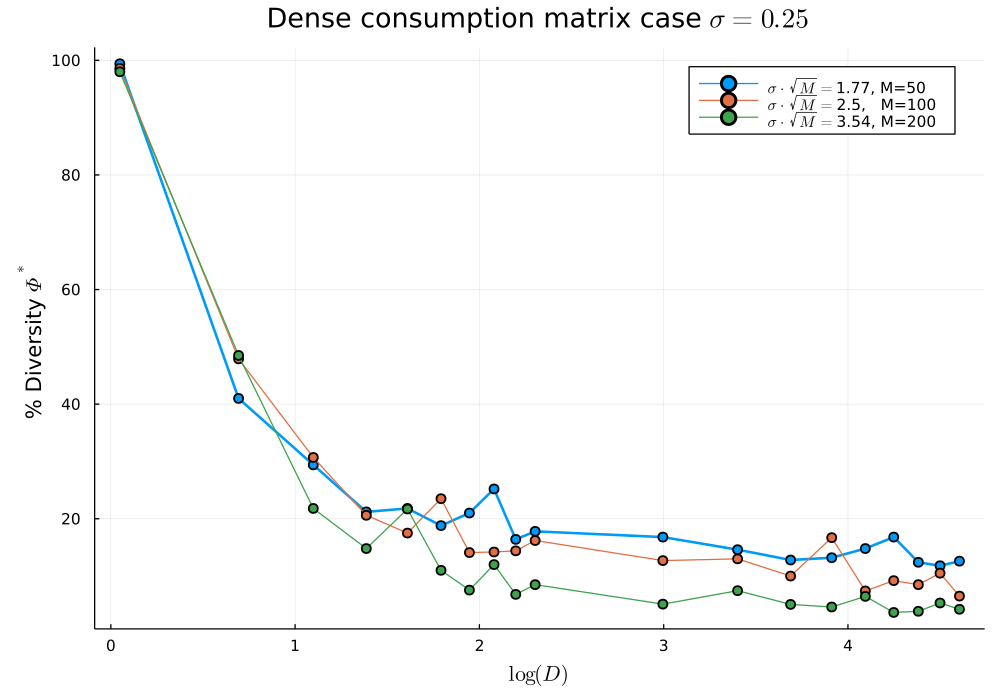

In [47]:
plot(log.(D),(div./50)*100,marker=:circle,size=(1000,700),label=L"\sigma \cdot \sqrt{M} = "*"$sigma"*", M=50",linewidth=2,ylabel="% Diversity "*L"\varPhi^*",
     xlabel=L"\log(D)",title="Dense consumption matrix case "*L"\sigma=0.25",thickness_scaling=1.3)
plot!(log.(D),(div1/100)*100,marker=:circle,label=L"\sigma \cdot \sqrt{M} = "*"$sigma1"*",   M=100")
plot!(log.(D),(div2/200)*100,marker=:circle,label=L"\sigma \cdot \sqrt{M} = "*"$sigma2"*", M=200")
# savefig("comparison_diversity_dense.png")

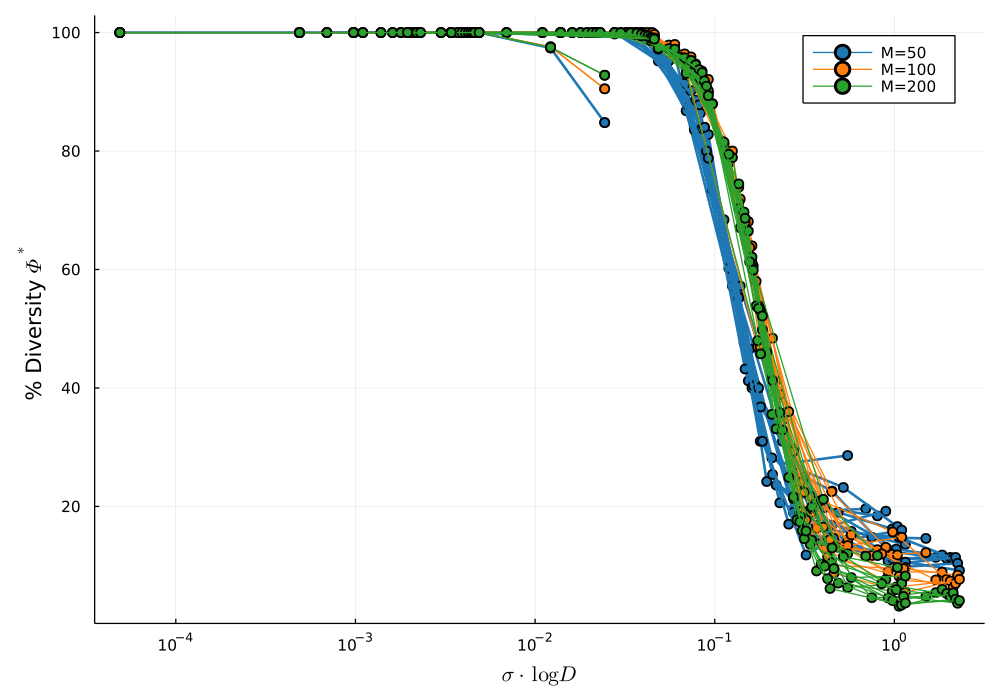

In [84]:
plot([((si)*sqrt(1))*log(D[i]) for i in 1:19],([values(dictionary_diversity)...]./50)*100,size=(1000,700),
     linewidth=2,label="",xlabel=L"\sigma \cdot \log{D}",xaxis=:log10,color=b,marker=:circle,
     ylabel="% Diversity "*L"\varPhi^*",thickness_scaling=1.3)
plot!([((si)*sqrt(1))*log(D[i]) for i in 1:19][1],([values(dictionary_diversity)...][1]./50)*100,label="M=50",color=b,
      marker=:circle)
plot!([((si)*sqrt(1))*log(D[i]) for i in 1:19],([values(dictionary_diversity1)...]./100)*100,color=o,marker=:circle,
      label="")
plot!([((si)*sqrt(1))*log(D[i]) for i in 1:19][1],([values(dictionary_diversity1)...][1]./100)*100,label="M=100",color=o,
      marker=:circle)
plot!([((si)*sqrt(1))*log(D[i]) for i in 1:19],([values(dictionary_diversity2)...]./200)*100,color=g,marker=:circle,
      label="")
plot!([((si)*sqrt(1))*log(D[i]) for i in 1:19][1],([values(dictionary_diversity2)...][1]./200)*100,label="M=200",color=g,
      marker=:circle)
# plot!(x,errf.*100,linewidth=2,color=:black)
# savefig("comparison_collapse.png")

In [77]:
b = colorant"#1f77b4";
o = colorant"#ff7f0e";
g = colorant"#2ca02c";